<a href="https://colab.research.google.com/github/ku21fan/CLL-STR/blob/main/demo_in_colab.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
!git clone https://github.com/ku21fan/CLL-STR
%cd CLL-STR

Cloning into 'CLL-STR'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 54 (delta 12), reused 53 (delta 11), pack-reused 0
Unpacking objects: 100% (54/54), done.
/jh.baek/github/for_release/test/CLL-STR


In [2]:
!wget -O SVTR_joint_All.pth https://www.dropbox.com/scl/fi/q9r2ebbnr94xv4azyl7o1/SVTR_joint_All.pth?rlkey=wsonhqkffwyb4jixva44p0s5y

--2023-12-17 18:37:12--  https://www.dropbox.com/scl/fi/q9r2ebbnr94xv4azyl7o1/SVTR_joint_All.pth?rlkey=wsonhqkffwyb4jixva44p0s5y
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6030:18::a27d:5012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc11563f07dc42e8c3b9b7ac1ad5.dl.dropboxusercontent.com/cd/0/inline/CJkweQIA1I5q5noJ8PenvpkEb72d-sIE-0ehGKu0xvdAonflhb6VLOusFRu96un3b1eIoCAIwFXUnK0iRbHQsMNPIKRYjN6KAeOhviznMR9D6TMHAfkc0bA4N_vVo3A-IZdEWkD-SfyTj19H-c82wZU3/file# [following]
--2023-12-17 18:37:12--  https://uc11563f07dc42e8c3b9b7ac1ad5.dl.dropboxusercontent.com/cd/0/inline/CJkweQIA1I5q5noJ8PenvpkEb72d-sIE-0ehGKu0xvdAonflhb6VLOusFRu96un3b1eIoCAIwFXUnK0iRbHQsMNPIKRYjN6KAeOhviznMR9D6TMHAfkc0bA4N_vVo3A-IZdEWkD-SfyTj19H-c82wZU3/file
Resolving uc11563f07dc42e8c3b9b7ac1ad5.dl.dropboxusercontent.com (uc11563f07dc42e8c3b9b7ac1ad5.dl.dropboxusercontent.com)... 162.125.80.

In [3]:
!ls

LICENSE			demo.py		     requirements.txt
README.md		demo_image	     test.py
SVTR_joint_All.pth	demo_in_colab.ipynb  train.py
charset			figures		     utils.py
create_lmdb_dataset.py	model.py
dataset.py		modules


In [4]:
output = !CUDA_VISIBLE_DEVICES=0 python3 demo.py --model_name SVTR --image_folder demo_image/ \
--saved_model SVTR_joint_All.pth

,img,id,label,conf
0,,demo_image/ARA.jpg,اﻟﺒﺎب,0.4966
1,,demo_image/BEN.jpg,রাখিবেন,0.9971
2,,demo_image/CHI.jpg,北京西,0.7356
3,,demo_image/HIN.jpg,मंडप,0.9198
4,,demo_image/JPN.jpg,くすり,0.7574
5,,demo_image/KOR.jpg,냉면은,0.7183
6,,demo_image/LAT.jpg,CUISINE,0.9392

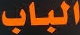
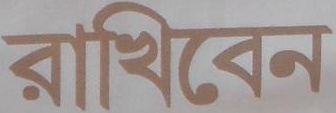
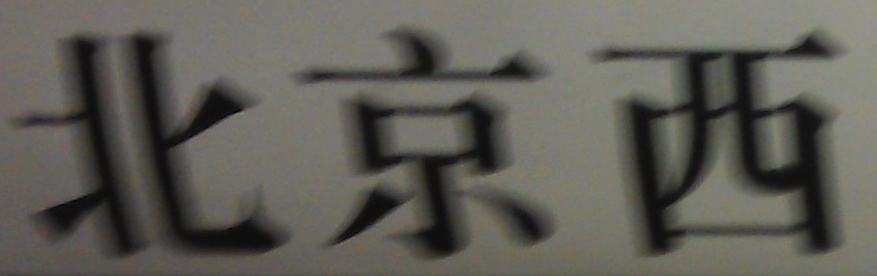
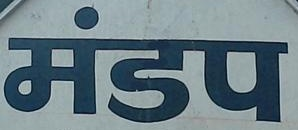
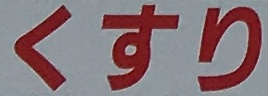
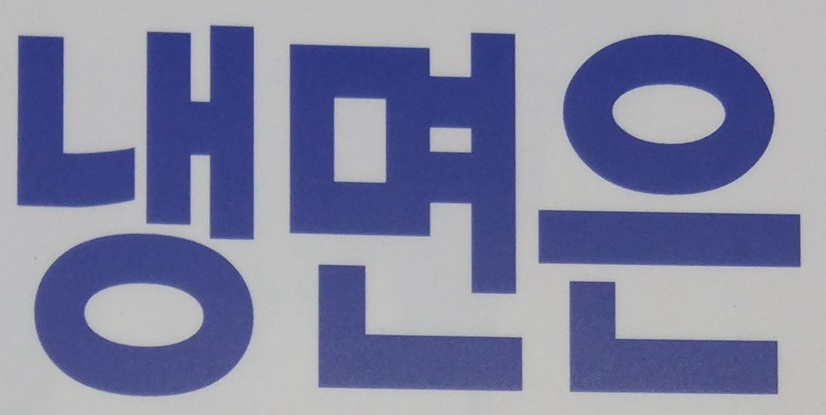

In [5]:
from IPython.core.display import display, HTML
from PIL import Image
import base64
import io
import pandas as pd

data = pd.DataFrame()
for ind, row in enumerate(output[output.index('image_path               \tpredicted_labels         \tconfidence score')+2:]):
  row = row.split('\t')
  filename = row[0].strip()
  label = row[1].strip()
  conf = row[2].strip()
  img = Image.open(filename)
  img_buffer = io.BytesIO()
  img.save(img_buffer, format="PNG")
  imgStr = base64.b64encode(img_buffer.getvalue()).decode("utf-8") 

  data.loc[ind, 'img'] = '<img src="data:image/png;base64,{0:s}">'.format(imgStr)
  data.loc[ind, 'id'] = filename
  data.loc[ind, 'label'] = label
  data.loc[ind, 'conf'] = conf

html_all = data.to_html(escape=False)
display(HTML(html_all))